In [25]:
from __future__ import print_function

import os
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K


# 전처리

In [26]:
label = os.listdir("train")

In [27]:
traindir = 'train'
testdir = 'test'

In [28]:
nums_dataset = []

for lb in label:
    data_perclass = os.listdir("train/"+lb)
    nums_dataset.append(len(data_perclass))

In [29]:
nums_dataset

[769, 1052, 784, 734, 984]

In [30]:
label

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

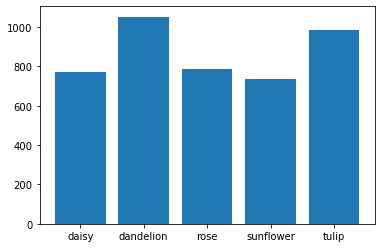

In [31]:
plt.bar(label,nums_dataset)
plt.show()

In [32]:
data_path = glob("train/*/*.jpg")
len(data_path)

4323

In [33]:
train_datagen = ImageDataGenerator(
    rescale = 1./255.,
    width_shift_range = 0.3,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(
    rescale = 1./255.,
    
)

In [34]:
train_generator = train_datagen.flow_from_directory(traindir,
                                                   target_size=(50, 50))

Found 4323 images belonging to 5 classes.


In [35]:
test_generator = test_datagen.flow_from_directory(testdir,
                                                 target_size=(50, 50))

Found 250 images belonging to 5 classes.


In [36]:
num_epoch = 10

In [38]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding = 'SAME',input_shape = (50,50,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

In [39]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [40]:
model.fit_generator(
        train_generator,
        steps_per_epoch = len(train_generator),
        epochs = num_epoch,
        validation_data = test_generator,
        validation_steps = len(test_generator)
)

Epoch 1/10
136/136 [==============================] - 20s 148ms/step - loss: 1.6356 - accuracy: 0.2695 - val_loss: 1.5349 - val_accuracy: 0.3680
Epoch 2/10
136/136 [==============================] - 20s 145ms/step - loss: 1.4150 - accuracy: 0.3683 - val_loss: 1.1099 - val_accuracy: 0.4840
Epoch 3/10
136/136 [==============================] - 20s 144ms/step - loss: 1.2785 - accuracy: 0.4557 - val_loss: 1.2981 - val_accuracy: 0.6040
Epoch 4/10
136/136 [==============================] - 20s 145ms/step - loss: 1.2052 - accuracy: 0.4950 - val_loss: 1.0283 - val_accuracy: 0.6040
Epoch 5/10
136/136 [==============================] - 20s 144ms/step - loss: 1.1520 - accuracy: 0.5230 - val_loss: 0.7617 - val_accuracy: 0.5880
Epoch 6/10
136/136 [==============================] - 20s 144ms/step - loss: 1.1222 - accuracy: 0.5496 - val_loss: 1.1774 - val_accuracy: 0.6440
Epoch 7/10
136/136 [==============================] - 20s 146ms/step - loss: 1.0851 - accuracy: 0.5658 - val_loss: 0.9901 - val_ac

In [21]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding = 'SAME',input_shape = (50,50,3)))
model.add(Conv2D(32, kernel_size=(3,3), padding = 'SAME', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding = 'SAME'))
model.add(Conv2D(64, kernel_size=(3,3), padding = 'SAME', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(5, activation='softmax'))

In [16]:
import os
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras import layers
#from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
imgs = []

for i in range(10):       
    path = data_path[i]
    img = image.load_img(path, target_size=(50, 50))
    img = np.array(img)
    imgs.append(img)
    
plt.figure(figsize=(200, 200))
plt.subplot(431)
plt.imshow(imgs[0])

plt.subplot(432)
plt.imshow(imgs[1])

plt.subplot(433)
plt.imshow(imgs[2])

plt.subplot(434)
plt.imshow(imgs[3])

plt.subplot(435)
plt.imshow(imgs[4])

plt.subplot(436)
plt.imshow(imgs[5])

plt.subplot(437)
plt.imshow(imgs[6])

plt.subplot(438)
plt.imshow(imgs[7])

plt.subplot(439)
plt.imshow(imgs[8])

plt.show()


In [ ]:
plt.imshow(img)
plt.show()

# Lable

In [16]:
def get_label(path):
    class_name = path.split('\\')[-2]
    label = class_name
    return label

In [17]:
get_label(path)

'daisy'

In [18]:
heights = []
widths = []

In [19]:
for path in data_path:
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile)
    h ,w = image[:,:,0].shape
    
    heights.append(h)
    widths.append(w)

Text(0.5, 1.0, 'Widths')

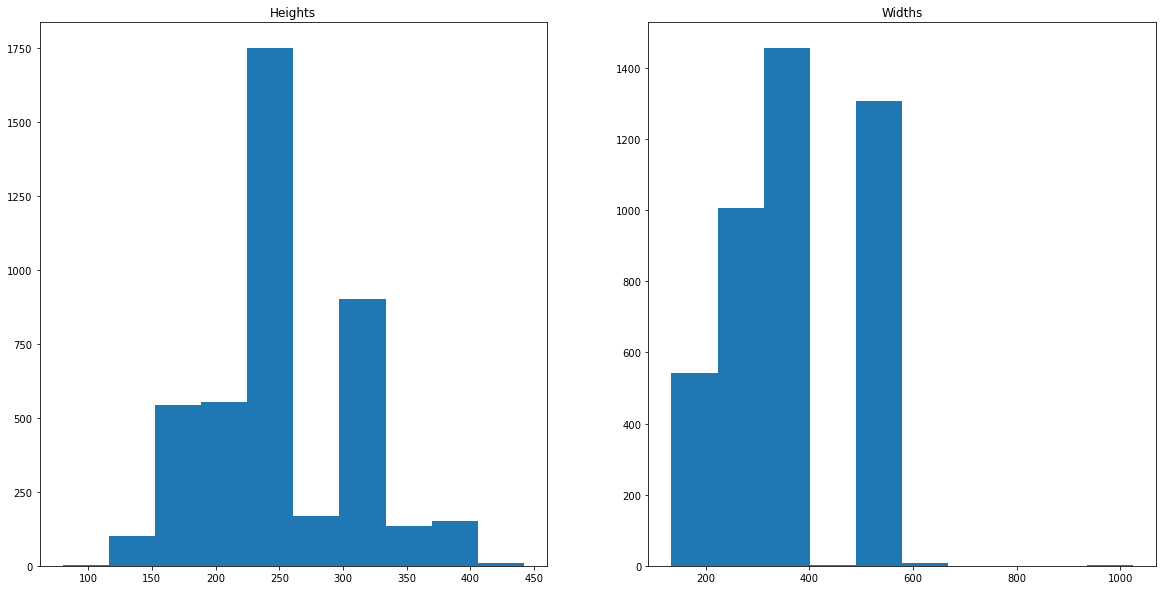

In [20]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.hist(heights)
plt.title("Heights")

plt.subplot(122)
plt.hist(widths)
plt.title("Widths")